In [1]:
from pycalphad import Database, calculate, Model, ReferenceState, variables as v
from tinydb import where
import matplotlib.pyplot as plt
import numpy as np
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S
from collections import Counter
from pycalphad import equilibrium
from pycalphad.models.model_mqmqa import ModelMQMQA

dbf = Database("NaCl-AlCl3.dat")

mod = ModelMQMQA(dbf,['AL','CL','VA'], 'MSSOLN')

comps=['AL','CL','VA']

phase=['MSSOLN']

conds = {v.N: 1,v.P: 101325, v.T: 2000, v.X("CL"):0.4}

result=equilibrium(dbf, comps, phase, conds, model={'MSSOLN': ModelMQMQA}, calc_opts={'pdens': 2000})

print(mod.constituents)

print(result.GM)
print(result.Y)

GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)
0.75 0.5
0.75 0.5
[[Species('AL+3.0AL+3.0CL-1.0CL-1.0', 'AL+3.02.0CL-1.02.0'), Species('AL+3.0AL+3.0CL-1.0VA-1.0', 'AL+3.02.0CL-1.01.0VA-1.01.0'), Species('AL+3.0AL+3.0VA-1.0VA-1.0', 'AL+3.02.0VA-1.02.0'), Species('AL+3.0AL2+6.0CL-1.0CL-1.0', 'AL+3.01.0AL2+6.01.0CL-1.02.0'), Species('AL+3.0AL2+6.0CL-1.0VA-1.0', 'AL+3.01.0AL2+6.01.0CL-1.01.0VA-1.01.0'), Species('AL+3.0AL2+6.0VA-1.0VA-1.0', 'AL+3.01.0AL2+6.01.0VA-1.02.0'), Species('AL2+6.0AL2+6.0CL-1.0CL-1.0', 'AL2+6.02.0CL-1.02.0'), Species('AL2+6.0AL2+6.0CL-1.0VA-1.0', 'AL2+6.02.0CL-1.01.0VA-1.01.0'), Species('AL2+6.0AL2+6.0VA-1.0VA-1.0', 'AL2+6.02.0VA-1.02.0')]]
<xarray.DataArray 'GM' (N: 1, P: 1, T: 1, X_CL: 1)>
array([[[[-250126.02678749]]]])
Coordinates:
  * N        (N) float64 1.0
  * P        (P) float64 1.013e+05
  * T        (T) float64 2e+03
  * X_CL     (X_CL) float64 0.4
<xarr

In [1]:
from pycalphad import Database, calculate, variables as v
from pycalphad import Model
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from numpy import log as ln
from pycalphad.models.model_mqmqa import ModelMQMQA

dbf=Database("NaCl-AlCl3.dat")


AL1 =  v.Species('AL+3.0', constituents={'AL': 1.0}, charge=3)
ACE2 = v.Species('AL2+6.0', constituents={'AL': 2.0}, charge=6)
NA = v.Species('NA+1.0', constituents={'NA': 1.0}, charge=1)
VA = v.Species('VA-1.0', constituents={'VA': 1.0}, charge=-1)
CL =  v.Species('CL-1.0', constituents={'CL': 1.0}, charge=-1)

mod = ModelMQMQA(dbf,['AL','CL','NA','VA'], 'MSSOLN')


subs_dict ={mod._p(AL1,AL1,CL,CL):  6.3791584653926129E-004,
            mod._p(ACE2,ACE2,CL,CL): 3.8811549082725080E-006,
            mod._p(NA,NA,CL,CL):   1.4781235376008900E-003,
            mod._p(AL1,NA,CL,CL): 1.3481825751638260E-002,
            mod._p(ACE2,NA,CL,CL): 7.6370284935186835E-004,
            mod._p(AL1,ACE2,CL,CL): 9.9515839458914692E-005,

            mod._p(AL1,AL1,VA,VA): 0.32058587328486993,
            mod._p(ACE2,ACE2,VA,VA): 2.7364036906086225E-002,
            mod._p(NA,NA,VA,VA): 7.7157465673011070E-003 ,
            mod._p(AL1,NA,VA,VA): 9.9469781367511917E-002,
            mod._p(ACE2,NA,VA,VA): 2.9060899767704335E-002,
            mod._p(AL1,ACE2,VA,VA): 0.18732350272457959,

            mod._p(AL1,AL1,CL,VA): 0.14525572838423456,
            mod._p(ACE2,ACE2,CL,VA): 6.1970721597719039E-004,
            mod._p(NA,NA,CL,VA): 1.4669689452844673E-002,
            mod._p(AL1,NA,CL,VA): 0.11697558320795903,
            mod._p(ACE2,NA,CL,VA): 8.7163644244155018E-003,
            mod._p(AL1,ACE2,CL,VA): 2.5778121717018414E-002,
            v.T: 2000
            }

ex=float(mod.models['xsmix'].subs(subs_dict))
TSM_pycalphad =float(mod.models['idmix'].subs(subs_dict))
TF =float(mod.models['ref'].subs(subs_dict))
#print(mod.M(dbf,VA).subs(subs_dict))

print('Hate troubleshooting',mod.ξ(AL1,VA).subs(subs_dict))

print('Hate troubleshooting mass and stuff',mod.M(dbf,ACE2).subs(subs_dict))

#print(TSM_pycalphad)
#print(ex)
#print('normalization',TF)
#print('GM',TF+TSM_pycalphad+ex)

#print('The new one man',mod.M(dbf,AL))

#print(mod.ξ(NA,CL).subs(subs_dict))
#print(mod.ξ(NA,VA).subs(subs_dict))
#print(mod.ξ(AL1,CL).subs(subs_dict))

#print(mod.Z(dbf,NA,AL1,NA,CL,CL))
#print(mod.Z(dbf,AL1,AL1,NA,CL,CL))
#print(mod.Z(dbf,NA,AL1,NA,CL,CL))


#print('NA,NA,CL,CL',mod.Z(dbf,NA,NA,NA,CL,CL))
#print('NA,NA,VA,VA',mod.Z(dbf,NA,NA,NA,VA,VA))
#print('NA,NA,CL,VA',mod.Z(dbf,NA,NA,NA,CL,VA))

#print('NA,AL1,CL,CL',mod.Z(dbf,NA,NA,AL1,CL,CL))
#print('NA,AL1,VA,VA',mod.Z(dbf,NA,NA,AL1,VA,VA))
#print('NA,AL1,CL,VA',mod.Z(dbf,NA,NA,AL1,CL,VA))

print('NA,AL1,VA,VA',mod.Z(dbf,AL1,AL1,ACE2,CL,VA))
print('NA,AL1,VA,VA',mod.Z(dbf,ACE2,AL1,ACE2,CL,VA))
print('NA,AL1,VA,VA',mod.Z(dbf,CL,AL1,ACE2,CL,VA))
print('NA,AL1,VA,VA',mod.Z(dbf,VA,AL1,ACE2,CL,VA))

#print('NA,ACE2,VA,VA',mod.Z(dbf,NA,NA,ACE2,VA,VA))
#print('NA,ACE2,CL,VA',mod.Z(dbf,NA,NA,ACE2,CL,VA))


i=[j for j in mod.components for o in j.constituents if o!='VA']


GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)
{'phase_name': 'MSSOLN', 'constituent_array': ((Species('NA+1.0', 'NA1.0', charge=1.0),), (Species('CL-1.0', 'CL1.0', charge=-1.0),)), 'parameter_type': 'G', 'parameter_order': 0, 'parameter': Piecewise((0.0037656*T**2 - 77.7638*T*log(T) + 442.50914*T - 417806.54, (T >= 298.15) & (T < 1500.0)), (-66.466247*T*log(T) + 359.88689*T - 409332.81, (T >= 1500.0) & (T < 4407.0)), (0, True)), 'diffusing_species': None, 'reference': None}
{'phase_name': 'MSSOLN', 'constituent_array': ((Species('NA+1.0', 'NA1.0', charge=1.0),), (Species('VA-1.0', 'VA1.0', charge=-1.0),)), 'parameter_type': 'G', 'parameter_order': 0, 'parameter': Piecewise((4241.1425*T**0.5 - 6.8646169e-7*T**3 - 0.0015066806*T**2 + 3.849533*T*log(T) - 179.20949*T - 7794.4359*log(T) + 3374.8294, (T >= 298.15) & (T < 1600.1)), (-21.0*T*log(T) + 67.0225*T + 8209.2053, (T >= 1600.1) & (T

In [4]:
from pycalphad import Database, calculate, variables as v
from pycalphad import Model
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from numpy import log as ln
from pycalphad.models.model_mqmqa import ModelMQMQA

dbf=Database("NaCl-AlCl3.dat")


AL1 =  v.Species('AL+3.0', constituents={'AL': 1.0}, charge=3)
ACE2 = v.Species('AL2+6.0', constituents={'AL': 1.0}, charge=6)
NA = v.Species('NA+1.0', constituents={'NA': 1.0}, charge=1)
VA = v.Species('VA-1.0', constituents={'VA': 1.0}, charge=-1)
CL =  v.Species('CL-1.0', constituents={'CL': 1.0}, charge=-1)

mod = ModelMQMQA(dbf,['AL','CL','NA','VA'], 'MSSOLN')


subs_dict ={mod._p(AL1,AL1,CL,CL):  2.6182840745249642E-002,
            mod._p(ACE2,ACE2,CL,CL): 1.3549183743218920E-002,
            mod._p(NA,NA,CL,CL):   0.25525340307909811,
            mod._p(AL1,NA,CL,CL): 0.39891897112966501,
            mod._p(ACE2,NA,CL,CL): 0.26842565996079826,
            mod._p(AL1,ACE2,CL,CL): 3.7669941341968077E-002,

            mod._p(AL1,AL1,VA,VA): 2.8863071098888370E-031,
            mod._p(ACE2,ACE2,VA,VA): 2.4471497580508598E-029,
            mod._p(NA,NA,VA,VA): 9.5730908772292304E-033,
            mod._p(AL1,NA,VA,VA): 9.3297256720273975E-032,
            mod._p(ACE2,NA,VA,VA): 5.2888195295829181E-031,
            mod._p(AL1,ACE2,VA,VA):  3.9606956886798537E-030,

            mod._p(AL1,AL1,CL,VA): 8.1552837767659145E-017,
            mod._p(ACE2,ACE2,CL,VA):  5.6561755002864498E-016,
            mod._p(NA,NA,CL,VA): 1.0050342959930670E-016,
            mod._p(AL1,NA,CL,VA): 2.7710212874748429E-016,
            mod._p(ACE2,NA,CL,VA): 5.4536890725979750E-016,
            mod._p(AL1,ACE2,CL,VA): 3.5522565898273709E-016,
            v.T: 2000
            }

ex=float(mod.models['xsmix'].subs(subs_dict))
TSM_pycalphad =float(mod.models['idmix'].subs(subs_dict))
TF =float(mod.models['ref'].subs(subs_dict))

print(TF)



GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)
1.3217785962123


In [3]:
from pycalphad import Database, calculate, variables as v
from pycalphad import Model
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from numpy import log as ln
from pycalphad.models.model_mqmqa import ModelMQMQA

dbf=Database("NaCl-AlCl3.dat")


AL1 =  v.Species('AL+3.0', constituents={'AL': 1.0}, charge=3)
ACE2 = v.Species('AL2+6.0', constituents={'AL': 2.0}, charge=6)
NA = v.Species('NA+1.0', constituents={'NA': 1.0}, charge=1)
VA = v.Species('VA-1.0', constituents={'VA': 1.0}, charge=-1)
CL =  v.Species('CL-1.0', constituents={'CL': 1.0}, charge=-1)

mod = ModelMQMQA(dbf,['NA','CL','VA'], 'MSSOLN')


subs_dict ={mod._p(NA,NA,CL,CL): 0.16435356080215321,
            mod._p(NA,NA,VA,VA): 0.35354272743823351,
            mod._p(NA,NA,CL,VA):0.48210371175961331,
            v.T: 2000
            }

ex=float(mod.models['xsmix'].subs(subs_dict))
TSM_pycalphad =float(mod.models['idmix'].subs(subs_dict))
TF =float(mod.models['ref'].subs(subs_dict))

print('configurational entropy',TSM_pycalphad/(2000*8.3145))
#print(1.5296*(TF+TSM_pycalphad+ex))

#print('NA,AL1,VA,VA',mod.M(dbf,AL1).subs(subs_dict))
#print('NA,AL1,VA,VA',mod.M(dbf,ACE2).subs(subs_dict))
#print('NA,AL1,VA,VA',mod.M(dbf,CL).subs(subs_dict))
#print('NA,AL1,VA,VA',mod.M(dbf,VA).subs(subs_dict))


GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)
configurational entropy -0.22504753096591837


In [1]:
from pycalphad import Database, calculate, variables as v
from pycalphad import Model
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from numpy import log as ln
from pycalphad.models.model_mqmqa import ModelMQMQA

dbf=Database("NaCl-AlCl3.dat")
#THIS IS THE SCU_TEST_3 in THERMOCHIMICA

AL1 =  v.Species('AL+3.0', constituents={'AL': 1.0}, charge=3)
ACE2 = v.Species('AL2+6.0', constituents={'AL': 2.0}, charge=6)
NA = v.Species('NA+1.0', constituents={'NA': 1.0}, charge=1)
VA = v.Species('VA-1.0', constituents={'VA': 1.0}, charge=-1)
CL =  v.Species('CL-1.0', constituents={'CL': 1.0}, charge=-1)

mod = ModelMQMQA(dbf,['AL','CL','VA'], 'MSSOLN')


subs_dict ={mod._p(AL1,AL1,CL,CL): 7.8909E-03,
            mod._p(ACE2,ACE2,CL,CL): 1.3111E-02,
            mod._p(AL1,ACE2,CL,CL):2.0343E-02,

            mod._p(AL1,AL1,VA,VA):0.18703,
            mod._p(ACE2,ACE2,VA,VA):0.13350,
            mod._p(AL1,ACE2,VA,VA): 0.31602,

            mod._p(AL1,AL1,CL,VA): 7.6832E-02,
            mod._p(ACE2,ACE2,CL,VA):8.3672E-02,
            mod._p(AL1,ACE2,CL,VA):0.16161,
            v.T: 2000
            }

ex=float(mod.models['xsmix'].subs(subs_dict))
TSM_pycalphad =float(mod.models['idmix'].subs(subs_dict))
TF =float(mod.models['ref'].subs(subs_dict))

print('Configurational entropy',TSM_pycalphad/(2000*8.31446))
print('normalization',TF)
print((TF+TSM_pycalphad+ex))


print('MOLES CL',mod.M(dbf,CL).subs(subs_dict))
print('MOLES VA',mod.M(dbf,VA).subs(subs_dict))
print('MOLES AL2',mod.M(dbf,ACE2).subs(subs_dict))
print('MOLES AL',mod.M(dbf,AL1).subs(subs_dict))

#For the values from thermochimimica ϑ(AL1) are 0.53188244278469221
#For the values from thermochimimica ϑ(AL2) are 0.46811755721530784
print('cations','Al+3',mod.ϑ(dbf,AL1).subs(subs_dict),'Al2+6',mod.ϑ(dbf,ACE2).subs(subs_dict))
#For the values from thermochimimica ϑ(CL) are 0.22222222329123920
#For the values from thermochimimica ϑ(VA) are 0.77777777670876069
print('anions','CL-1',mod.ϑ(dbf,CL).subs(subs_dict),'VA-1',mod.ϑ(dbf,VA).subs(subs_dict))
#These don't agree perfectly. Not sure if this is enough to do the the difference


#THIS IS THE SECOND TERM OF THE CONFIGURATIONAL ENTROPY 

print('F(AL1),F(CL),F(AL2),F(VA)',mod.w(AL1).subs(subs_dict),mod.w(CL).subs(subs_dict),mod.w(ACE2).subs(subs_dict),mod.w(VA).subs(subs_dict))
#F(AL1),F(CL) is 0.52073462710635499 & 0.20240234506072335
#F(AL2),F(VA) is  0.47926537289364507 & 0.79759765493927670

print('X(AL1,CL)',mod.ξ(AL1,CL).subs(subs_dict))
#X(AL1,CL)=9.6881060306141700E-002 from Thermochimica
print('X(AL1,VA)',mod.ξ(AL1,VA).subs(subs_dict))
#X(AL1,VA)=0.42385356680021330 from Thermochimica
print('X(ACE2,CL)',mod.ξ(ACE2,CL).subs(subs_dict))
#X(AL2,CL)= 0.10552128475458165 from Thermochimica
print('X(ACE2,VA)',mod.ξ(ACE2,VA).subs(subs_dict))
#X(AL2,VA)= 0.37374408813906340 from Thermochimica

print(mod.M(dbf,CL).subs(subs_dict)*log(mod.ϑ(dbf,CL).subs(subs_dict)))
print('NA,AL1,VA,VA',mod.M(dbf,VA).subs(subs_dict))
print('NA,AL1,VA,VA',log(mod.ϑ(dbf,VA).subs(subs_dict)))
print(mod.M(dbf,VA).subs(subs_dict)*log(mod.ϑ(dbf,VA).subs(subs_dict)))

print('NA,AL1,VA,VA',mod.M(dbf,AL1).subs(subs_dict))
print('NA,AL1,VA,VA',log(mod.ϑ(dbf,AL1).subs(subs_dict)))
print(mod.M(dbf,AL1).subs(subs_dict)*log(mod.ϑ(dbf,AL1).subs(subs_dict)))

print('NA,AL1,VA,VA',mod.M(dbf,ACE2).subs(subs_dict))
print('NA,AL1,VA,VA',log(mod.ϑ(dbf,ACE2).subs(subs_dict)))
print(mod.M(dbf,ACE2).subs(subs_dict)*log(mod.ϑ(dbf,ACE2).subs(subs_dict)))
print('AL',mod.moles('AL').subs(subs_dict))
print('CL',mod.moles('CL').subs(subs_dict))
print('VA',mod.moles('VA').subs(subs_dict))



GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)
Configurational entropy -1.0314362362083653
normalization -191796.30300721878
-208947.9736642288
MOLES CL 0.334107137109370
MOLES VA 1.16939149035842
MOLES AL2 0.159799664915723
MOLES AL 0.181566877996857
cations Al+3 0.531882464074267 Al2+6 0.468117535925733
anions CL-1 0.222219781917645 VA-1 0.777780218082355
F(AL1),F(CL),F(AL2),F(VA) 0.520739400000000 0.202401900000000 0.479269500000000 0.797607000000000
X(AL1,CL) 0.0968809000000000
X(AL1,VA) 0.423858500000000
X(ACE2,CL) 0.105521000000000
X(ACE2,VA) 0.373748500000000
-0.502526662002272
NA,AL1,VA,VA 1.16939149035842
NA,AL1,VA,VA -0.251311290751372
-0.293881284835644
NA,AL1,VA,VA 0.181566877996857
NA,AL1,VA,VA -0.631332746240832
-0.114629115712130
NA,AL1,VA,VA 0.159799664915723
NA,AL1,VA,VA -0.759035869455697
-0.121293677598035
AL 0.600002634904744
CL 0.399997365095256
VA 1.4000105443873

In [2]:
from pycalphad import Database, calculate, variables as v
from pycalphad import Model
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from numpy import log as ln
from pycalphad.models.model_mqmqa import ModelMQMQA
from math import gcd
import numpy as np
from fractions import Fraction

dbf=Database("NaCl-AlCl3.dat")


AL1 =  v.Species('AL+3.0', constituents={'AL': 1.0}, charge=3)
ACE2 = v.Species('AL2+6.0', constituents={'AL': 2.0}, charge=6)
NA = v.Species('NA+1.0', constituents={'NA': 1.0}, charge=1)
VA = v.Species('VA-1.0', constituents={'VA': 1.0}, charge=-1)
CL =  v.Species('CL-1.0', constituents={'CL': 1.0}, charge=-1)

mod = ModelMQMQA(dbf,['AL','CL','VA'], 'MSSOLN')

subs_dict ={mod._p(AL1,AL1,CL,CL): 5.3840328899104426E-003,
            mod._p(ACE2,ACE2,CL,CL):8.0272071162822006E-003,
            mod._p(AL1,ACE2,CL,CL):1.3148194273546130E-002,

            mod._p(AL1,AL1,VA,VA):0.21781952464308316,
            mod._p(ACE2,ACE2,VA,VA):0.13789111586268318,
            mod._p(AL1,ACE2,VA,VA): 0.34661435234686638,

            mod._p(AL1,AL1,CL,VA): 6.8490801856688377E-002,
            mod._p(ACE2,ACE2,CL,VA):6.6539628689263622E-002,
            mod._p(AL1,ACE2,CL,VA):0.13608514232167648,
            v.T: 2000
            }

ex=float(mod.models['xsmix'].subs(subs_dict))
TSM_pycalphad =float(mod.models['idmix'].subs(subs_dict))
TF =float(mod.models['ref'].subs(subs_dict))


print(TSM_pycalphad/(2000*8.314))
print('normalization',TF)

no_vac=[j for j in mod.components for o in j.constituents if o!='VA']
comp=[k for i in no_vac for j,k in i.constituents.items()]


GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)
-0.9292705613929835
normalization -164685.30358209048


In [3]:
from pycalphad import Database, calculate, variables as v
from pycalphad import Model
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from numpy import log as ln
from pycalphad.models.model_mqmqa import ModelMQMQA
from math import gcd
import numpy as np
from fractions import Fraction

dbf=Database("NaCl-AlCl3.dat")


AL1 =  v.Species('AL+3.0', constituents={'AL': 1.0}, charge=3)
ACE2 = v.Species('AL2+6.0', constituents={'AL': 2.0}, charge=6)
NA = v.Species('NA+1.0', constituents={'NA': 1.0}, charge=1)
VA = v.Species('VA-1.0', constituents={'VA': 1.0}, charge=-1)
CL =  v.Species('CL-1.0', constituents={'CL': 1.0}, charge=-1)

mod = ModelMQMQA(dbf,['AL','CL','VA'], 'MSSOLN')

subs_dict ={mod._p(AL1,AL1,CL,CL): 1.1244005363030773E-002,
            mod._p(ACE2,ACE2,CL,CL):2.1229005168556383E-002,
            mod._p(AL1,ACE2,CL,CL):3.0899778199331655E-002,

            mod._p(AL1,AL1,VA,VA):0.15452205868517627,
            mod._p(ACE2,ACE2,VA,VA):0.12706872344362791,
            mod._p(AL1,ACE2,VA,VA): 0.28024932288053789,

            mod._p(AL1,AL1,CL,VA): 8.3365385060294936E-002,
            mod._p(ACE2,ACE2,CL,VA):0.10387574474822893,
            mod._p(AL1,ACE2,CL,VA):0.18754597645121532,
            v.T: 2000
            }
ex=float(mod.models['xsmix'].subs(subs_dict))
TSM_pycalphad =float(mod.models['idmix'].subs(subs_dict))
TF =float(mod.models['ref'].subs(subs_dict))


print(TSM_pycalphad/(2000*8.314))
print('normalization',TF)
print(TSM_pycalphad+TF+ex)

GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)
-1.1333311006764495
normalization -224763.69375286976
-243608.72329491776


In [3]:
from pycalphad import Database, calculate, variables as v
from pycalphad import Model
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from numpy import log as ln
from pycalphad.models.model_mqmqa import ModelMQMQA
from math import gcd
import numpy as np
from fractions import Fraction

dbf=Database("NaCl-AlCl3.dat")


AL1 =  v.Species('AL+3.0', constituents={'AL': 1.0}, charge=3)
ACE2 = v.Species('AL2+6.0', constituents={'AL': 2.0}, charge=6)
NA = v.Species('NA+1.0', constituents={'NA': 1.0}, charge=1)
VA = v.Species('VA-1.0', constituents={'VA': 1.0}, charge=-1)
CL =  v.Species('CL-1.0', constituents={'CL': 1.0}, charge=-1)

mod = ModelMQMQA(dbf,['AL','CL','VA'], 'MSSOLN')

subs_dict ={mod._p(AL1,AL1,CL,CL): 9.1886696181313118E-003,
            mod._p(ACE2,ACE2,CL,CL):2.4481499004963474E-002,
            mod._p(AL1,ACE2,CL,CL):2.9996828490984319E-002,

            mod._p(AL1,AL1,VA,VA):0.14373059754874323,
            mod._p(ACE2,ACE2,VA,VA):0.13743002603425203,
            mod._p(AL1,ACE2,VA,VA): 0.28109001949686552,

            mod._p(AL1,AL1,CL,VA):7.2682679501845773E-002,
            mod._p(ACE2,ACE2,CL,VA):0.11600850047499767,
            mod._p(AL1,ACE2,CL,VA):0.18539117982921652,
            v.T: 2000
            }

ex=float(mod.models['xsmix'].subs(subs_dict))
TSM_pycalphad =float(mod.models['idmix'].subs(subs_dict))
TF =float(mod.models['ref'].subs(subs_dict))

print(mod._p(AL1,AL1,CL,VA).subs(subs_dict))
print(TSM_pycalphad/(1600*8.314))
print('normalization',TF)
print(TSM_pycalphad+TF+ex)

GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)
term1 1.6 1.6 AL+3.0 AL+3.0 CL-1.0 CL-1.0
second term Piecewise((-125.52*T*log(T) + 671.22069*T - 695406.24, (T >= 298.15) & (T < 4407.1001)), (0, True)) AL+3.0 AL+3.0 CL-1.0 CL-1.0
term1 1.6 2.0 AL+3.0 AL+3.0 CL-1.0 VA-1.0
second term Piecewise((-125.52*T*log(T) + 671.22069*T - 695406.24, (T >= 298.15) & (T < 4407.1001)), (0, True)) AL+3.0 AL+3.0 CL-1.0 VA-1.0
term1 2.0 2.0 AL+3.0 AL+3.0 VA-1.0 VA-1.0
second term Piecewise((19378.141*T**0.5 - 0.024491992*T**2 + 117.83044*T*log(T) - 1211.4093*T - 52047.426*log(T) + 127105.29 - 952816.79/T, (T >= 298.15) & (T < 720.0)), (-31.751*T*log(T) + 177.67776*T - 944.02909 + 4.3920384e-12/T, (T >= 720.0) & (T < 3000.0)), (-31.751*T*log(T) + 177.67776*T - 944.02909, (T >= 3000.0) & (T < 4407.1001)), (0, True)) AL+3.0 AL+3.0 VA-1.0 VA-1.0
term1 1.2307692 1.2307692 AL+3.0 AL2+6.0 CL-1.0 CL-1.0
second t

In [2]:
from pycalphad import Database, calculate, variables as v
from pycalphad import Model
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from numpy import log as ln
from pycalphad.models.model_mqmqa import ModelMQMQA
from math import gcd
import numpy as np
from fractions import Fraction

dbf=Database("NaCl-AlCl3.dat")


AL1 =  v.Species('AL+3.0', constituents={'AL': 1.0}, charge=3)
ACE2 = v.Species('AL2+6.0', constituents={'AL': 2.0}, charge=6)
NA = v.Species('NA+1.0', constituents={'NA': 1.0}, charge=1)
VA = v.Species('VA-1.0', constituents={'VA': 1.0}, charge=-1)
CL =  v.Species('CL-1.0', constituents={'CL': 1.0}, charge=-1)

mod = ModelMQMQA(dbf,['AL','CL','VA'], 'MSSOLN')

    
subs_dict ={mod._p(AL1,AL1,CL,CL):7.8908628685971979E-003,
            mod._p(ACE2,ACE2,CL,CL):1.3110993010356117E-002,
            mod._p(AL1,ACE2,CL,CL):2.0342768795697144E-002,

            mod._p(AL1,AL1,VA,VA):0.18702515716178644,
            mod._p(ACE2,ACE2,VA,VA):0.13349558419395546,
            mod._p(AL1,ACE2,VA,VA):0.31601919319746197,

            mod._p(AL1,AL1,CL,VA):7.6832021140707946E-002,
            mod._p(ACE2,ACE2,CL,VA):8.3672209754069998E-002,
            mod._p(AL1,ACE2,CL,VA):0.16161120987736788,
            v.T: 2000
            }

ex=float(mod.models['xsmix'].subs(subs_dict))
TSM_pycalphad =float(mod.models['idmix'].subs(subs_dict))
TF =float(mod.models['ref'].subs(subs_dict))

print(TSM_pycalphad/(2000*8.314472))
print(TSM_pycalphad)
print('this is ex',ex)
print('normalization',TF)
print(TSM_pycalphad+TF+ex)
print('REAL normalization',1/mod.normalization.subs(subs_dict))

#COME BACK TO THIS CELL!!!!

print('X(AL1,CL)',mod.ξ(AL1,CL).subs(subs_dict))
#X(AL1,CL)=9.6881060306141700E-002 from Thermochimica
print('X(AL1,VA)',mod.ξ(AL1,VA).subs(subs_dict))
#X(AL1,VA)=0.42385356680021330 from Thermochimica
print('X(ACE2,CL)',mod.ξ(ACE2,CL).subs(subs_dict))
#X(AL2,CL)= 0.10552128475458165 from Thermochimica
print('X(ACE2,VA)',mod.ξ(ACE2,VA).subs(subs_dict))
#X(AL2,VA)= 0.37374408813906340 from Thermochimica

GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)
0.75 0.5
-1.2330521789788573
-20504.355633317395
this is ex 0.0
normalization -229621.67159359742
-250126.02722691483
REAL normalization 1.19721795206044
X(AL1,CL) 0.0968810603061417
X(AL1,VA) 0.423853566800213
X(ACE2,CL) 0.105521284754582
X(ACE2,VA) 0.373744088139063


In [6]:
from pycalphad import Database, calculate, variables as v
from pycalphad import Model
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from numpy import log as ln
from pycalphad.models.model_mqmqa import ModelMQMQA
from math import gcd
import numpy as np
from fractions import Fraction

dbf=Database("NaCl-AlCl3.dat")


#  System Component  Mass [mol]  Chemical potential [J/mol]
#  ----------------  ----------  --------------------------
#  Cl                2.5000E-01  -4.967606E+05
#  Al                2.5000E-01  -1.309342E+05
#  Na                5.0000E-01  -2.044833E+05
#  Temperature =    2000.00 [K]
#  Pressure    =     1.0000 [atm]


AL1 =  v.Species('AL+3.0', constituents={'AL': 1.0}, charge=3)
ACE2 = v.Species('AL2+6.0', constituents={'AL': 2.0}, charge=6)
NA = v.Species('NA+1.0', constituents={'NA': 1.0}, charge=1)
VA = v.Species('VA-1.0', constituents={'VA': 1.0}, charge=-1)
CL =  v.Species('CL-1.0', constituents={'CL': 1.0}, charge=-1)

mod = ModelMQMQA(dbf,['AL','CL','NA','VA'], 'MSSOLN')



subs_dict ={mod._p(NA,NA,CL,CL):0.18884816042508967,
            mod._p(ACE2,NA,CL,CL):6.8475178653242655E-005,
            mod._p(AL1,NA,CL,CL):5.2889732790483497E-004,
    
            mod._p(AL1,AL1,CL,CL):2.1858978014342848E-007,
            mod._p(ACE2,ACE2,CL,CL):1.3855492392236905E-009,
            mod._p(AL1,ACE2,CL,CL): 3.4806145617748617E-008,

            mod._p(AL1,AL1,VA,VA):1.9781118411404449E-002,
            mod._p(ACE2,ACE2,VA,VA):3.6921986289441058E-002,
            mod._p(AL1,ACE2,VA,VA):5.4050279658944878E-002,
            
            mod._p(NA,NA,VA,VA):0.12736194566048836,
            mod._p(NA,AL1,VA,VA):0.10038648770142627,
            mod._p(NA,ACE2,VA,VA):0.13714891193871337,

            mod._p(AL1,AL1,CL,VA):1.3151350234166901E-004,
            mod._p(ACE2,ACE2,CL,VA):1.4304856519972422E-005,
            mod._p(NA,NA,CL,VA):0.31017459048829144,
            
            mod._p(AL1,ACE2,CL,VA):8.1689100970242038E-005,
            mod._p(ACE2,NA,CL,VA):6.1290443780778765E-003,            
            mod._p(AL1,NA,CL,VA):1.8372340300257774E-002,
            v.T: 2000
            }

ex=float(mod.models['xsmix'].subs(subs_dict))
TSM_pycalphad =float(mod.models['idmix'].subs(subs_dict))
TF =float(mod.models['ref'].subs(subs_dict))



print(ex)
print(TSM_pycalphad/(2000*8.314472))
print(TF)
print(TSM_pycalphad+TF+ex)
print(mod.moles('NA').subs(subs_dict))
print(mod.moles('CL').subs(subs_dict))
print(mod.moles('AL').subs(subs_dict))
print('REAL normalization',1/mod.normalization.subs(subs_dict))
print(-2.59165E+05/1.9752)
print(-2.59165E+05/1.97521013230788)
print((TSM_pycalphad+TF+ex)-(-2.59165E+05/1.97521013230788))
print((TSM_pycalphad+TF+ex)-(-2.59165E+05/1.9752))

GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)
0.75 0.5
-135.2862950540449
-0.3120040035585967
-125885.43142574606
-131209.01482375182
0.499999999999167
0.250000000001250
0.249999999999583
REAL normalization 1.97521013230788
-131209.49777237748
-131208.8247022031
-0.19012154871597886
0.4829486256639939


0.5


GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)


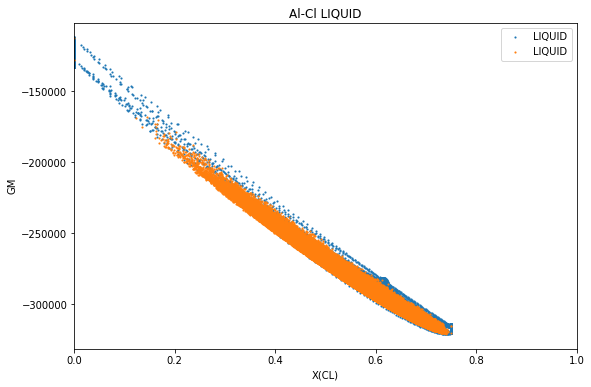

In [11]:
from pycalphad import Database, calculate, Model, ReferenceState, variables as v
from tinydb import where
import matplotlib.pyplot as plt
import numpy as np
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S
from collections import Counter
from pycalphad import equilibrium
from pycalphad.models.model_mqmqa import ModelMQMQA

dbf = Database("NaCl-AlCl3.dat")

mod = ModelMQMQA(dbf,['AL','CL','VA'], 'MSSOLN')

comps=['AL','CL','VA']

phase=['MSSOLN']

result=calculate(dbf, comps, phase,model={'MSSOLN': ModelMQMQA},P=101325, T=2000, output='GM',pdens= 100)
result2=calculate(dbf, comps, phase,model={'MSSOLN': ModelMQMQA},P=101325, T=2000, output='GM',pdens= 100000,grid_points=False)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.scatter(result.X.sel(component='CL'), result.GM, marker='.', s=5, label='LIQUID')
ax.scatter(result2.X.sel(component='CL'), result2.GM, marker='.', s=5, label='LIQUID')

ax.set_xlim((0, 1))
ax.set_xlabel('X(CL)')
ax.set_ylabel('GM')
ax.set_title('Al-Cl LIQUID')
ax.legend()
#plt.xlim(0.45, 0.8)
#plt.ylim(-250000, -215000)
plt.show()



GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)


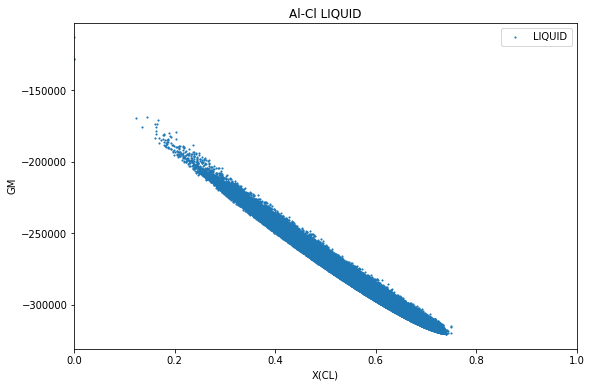

In [9]:
from pycalphad import Database, calculate, Model, ReferenceState, variables as v
from tinydb import where
import matplotlib.pyplot as plt
import numpy as np
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S
from collections import Counter
from pycalphad import equilibrium
from pycalphad.models.model_mqmqa import ModelMQMQA

dbf = Database("NaCl-AlCl3.dat")

mod = ModelMQMQA(dbf,['AL','CL','VA'], 'MSSOLN')

comps=['AL','CL','VA']

phase=['MSSOLN']

result=calculate(dbf, comps, phase,model={'MSSOLN': ModelMQMQA},P=101325, T=2000, output='GM',pdens= 100000,grid_points=False)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.scatter(result.X.sel(component='CL'), result.GM, marker='.', s=5, label='LIQUID')
ax.set_xlim((0, 1))
ax.set_xlabel('X(CL)')
ax.set_ylabel('GM')
ax.set_title('Al-Cl LIQUID')
ax.legend()
#plt.xlim(0.45, 0.8)
#plt.ylim(-250000, -215000)
plt.show()



In [2]:
from pycalphad import Database, calculate, Model, ReferenceState, variables as v
from tinydb import where
import matplotlib.pyplot as plt
import numpy as np
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S
from collections import Counter
from pycalphad import equilibrium
from pycalphad.models.model_mqmqa import ModelMQMQA

dbf = Database("NaCl-AlCl3.dat")

mod = ModelMQMQA(dbf,['AL','CL','NA','VA'], 'MSSOLN')

comps=['AL','CL','NA','VA']

phase=['MSSOLN']

conds = {v.N: 1,v.P: 101325, v.T: 2000, v.X("CL"):0.3, v.X("NA"):0.35}

result=equilibrium(dbf, comps, phase, conds, model={'MSSOLN': ModelMQMQA}, calc_opts={'pdens': 2000})


print(mod.constituents)


print(result.GM)
print(result.Y)
print(result.NP)
print(result.Phase)

GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)
[[Species('AL+3.0AL+3.0CL-1.0CL-1.0', 'AL+3.02.0CL-1.02.0'), Species('AL+3.0AL+3.0CL-1.0VA-1.0', 'AL+3.02.0CL-1.01.0VA-1.01.0'), Species('AL+3.0AL+3.0VA-1.0VA-1.0', 'AL+3.02.0VA-1.02.0'), Species('AL+3.0AL2+6.0CL-1.0CL-1.0', 'AL+3.01.0AL2+6.01.0CL-1.02.0'), Species('AL+3.0AL2+6.0CL-1.0VA-1.0', 'AL+3.01.0AL2+6.01.0CL-1.01.0VA-1.01.0'), Species('AL+3.0AL2+6.0VA-1.0VA-1.0', 'AL+3.01.0AL2+6.01.0VA-1.02.0'), Species('AL+3.0NA+1.0CL-1.0CL-1.0', 'AL+3.01.0CL-1.02.0NA+1.01.0'), Species('AL+3.0NA+1.0CL-1.0VA-1.0', 'AL+3.01.0CL-1.01.0NA+1.01.0VA-1.01.0'), Species('AL+3.0NA+1.0VA-1.0VA-1.0', 'AL+3.01.0NA+1.01.0VA-1.02.0'), Species('AL2+6.0AL2+6.0CL-1.0CL-1.0', 'AL2+6.02.0CL-1.02.0'), Species('AL2+6.0AL2+6.0CL-1.0VA-1.0', 'AL2+6.02.0CL-1.01.0VA-1.01.0'), Species('AL2+6.0AL2+6.0VA-1.0VA-1.0', 'AL2+6.02.0VA-1.02.0'), Species('AL2+6.0NA+1.0CL-1.0CL-1.0'

In [1]:
from pycalphad import Database, calculate, variables as v
from pycalphad import Model
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from numpy import log as ln
from pycalphad.models.model_mqmqa import ModelMQMQA
from math import gcd
import numpy as np
from fractions import Fraction

dbf=Database("NaCl-AlCl3.dat")


AL1 =  v.Species('AL+3.0', constituents={'AL': 1.0}, charge=3)
ACE2 = v.Species('AL2+6.0', constituents={'AL': 2.0}, charge=6)
NA = v.Species('NA+1.0', constituents={'NA': 1.0}, charge=1)
VA = v.Species('VA-1.0', constituents={'VA': 1.0}, charge=-1)
CL =  v.Species('CL-1.0', constituents={'CL': 1.0}, charge=-1)

mod = ModelMQMQA(dbf,['AL','CL','NA','VA'], 'MSSOLN')

    
subs_dict ={mod._p(NA,NA,CL,CL): 0.34720873392578311,
            mod._p(ACE2,NA,CL,CL):5.7075360336439396E-002,
            mod._p(AL1,NA,CL,CL):0.10907818398976162,
    
            mod._p(AL1,AL1,CL,CL): 1.6561894989330099E-003,
            mod._p(ACE2,ACE2,CL,CL):4.9249977994179331E-004,
            mod._p(AL1,ACE2,CL,CL): 1.8062923459100952E-003,

            mod._p(AL1,AL1,VA,VA):1.9505119127783882E-002,
            mod._p(ACE2,ACE2,VA,VA):6.5554372293723753E-002,
            mod._p(AL1,ACE2,VA,VA): 7.1516315368607739E-002,
            
            mod._p(NA,NA,VA,VA):3.3406159469597432E-003,
            mod._p(NA,AL1,VA,VA):1.6144238849341418E-002,
            mod._p(NA,ACE2,VA,VA):2.9596755327499516E-002,

            mod._p(AL1,AL1,CL,VA):1.1367352105912436E-002,
            mod._p(ACE2,ACE2,CL,VA):1.1364068625084479E-002,
            mod._p(NA,NA,CL,VA):6.8114346021332137E-002,
            
            mod._p(AL1,ACE2,CL,VA):2.2292480044532513E-002,
            mod._p(ACE2,NA,CL,VA):8.2200863136796656E-002,            
            mod._p(AL1,NA,CL,VA):8.1686213275656630E-002,
            v.T: 2000
            }

ex=float(mod.models['xsmix'].subs(subs_dict))
TSM_pycalphad =float(mod.models['idmix'].subs(subs_dict))
TF =float(mod.models['ref'].subs(subs_dict))


#print(ex)
#print(TSM_pycalphad/(2000*8.314))
#print(TSM_pycalphad+TF+ex)
print(TF)
#print('thermochimica',-3.12799E+05/1.1703)


#print(mod.moles('NA').subs(subs_dict))
#print(mod.moles('CL').subs(subs_dict))
#print(mod.moles('AL').subs(subs_dict))

#print('This is AL1-Al2-VA-VA')
print('NEW QUAD Z VALUE AL2_NA_CL_VA')
print(mod.Z(dbf,CL,ACE2,NA,CL,VA))
print(mod.Z(dbf,ACE2,ACE2,NA,CL,VA))
print(mod.Z(dbf,VA,ACE2,NA,CL,VA))
print(mod.Z(dbf,NA,ACE2,NA,CL,VA))

GAS_IDEAL
MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)
-296506.19028505415
NEW QUAD Z VALUE AL2_NA_CL_VA
1.7142857142857142
6.0
1.7142857142857142
6.0


In [13]:
print(mod.Z(dbf,VA,AL1,ACE2,VA,VA))
print(mod.Z(dbf,AL1,ACE2,AL1,VA,VA))
print(mod.Z(dbf,ACE2,ACE2,AL1,VA,VA))
print('NEW QUAD Z VALUE')
print(mod.Z(dbf,VA,NA,NA,VA,VA))
print(mod.Z(dbf,NA,NA,NA,VA,VA))
print('NEW QUAD Z VALUE')
print(mod.Z(dbf,VA,AL1,NA,VA,VA))
print(mod.Z(dbf,AL1,NA,AL1,VA,VA))
print(mod.Z(dbf,NA,NA,AL1,VA,VA))
print('NEW QUAD Z VALUE NA_AL2_VA_VA')
print(mod.Z(dbf,VA,ACE2,NA,VA,VA))
print(mod.Z(dbf,ACE2,NA,ACE2,VA,VA))
print(mod.Z(dbf,NA,NA,ACE2,VA,VA))
print('NEW QUAD Z VALUE AL1_AL2_CL_CL')
print(mod.Z(dbf,CL,ACE2,AL1,CL,CL))
print(mod.Z(dbf,ACE2,AL1,ACE2,CL,CL))
print(mod.Z(dbf,AL1,AL1,ACE2,CL,CL))
print('NEW QUAD Z VALUE AL1_NA_CL_CL')
print(mod.Z(dbf,CL,NA,AL1,CL,CL))
print(mod.Z(dbf,NA,NA,AL1,CL,CL))
print(mod.Z(dbf,AL1,AL1,NA,CL,CL))
print('NEW QUAD Z VALUE AL2_NA_CL_CL')
print(mod.Z(dbf,CL,NA,ACE2,CL,CL))
print(mod.Z(dbf,NA,NA,ACE2,CL,CL))
print(mod.Z(dbf,ACE2,ACE2,NA,CL,CL))
print('NEW QUAD Z VALUE AL_AL_CL_VA')
print(mod.Z(dbf,CL,AL1,AL1,CL,VA))
print(mod.Z(dbf,AL1,AL1,AL1,CL,VA))
print(mod.Z(dbf,VA,AL1,AL1,CL,VA))
print('NEW QUAD Z VALUE A2L_AL2_CL_VA')
print(mod.Z(dbf,CL,ACE2,ACE2,CL,VA))
print(mod.Z(dbf,ACE2,ACE2,ACE2,CL,VA))
print(mod.Z(dbf,VA,ACE2,ACE2,CL,VA))
print('NEW QUAD Z VALUE NA_NA_CL_VA')
print(mod.Z(dbf,CL,NA,NA,CL,VA))
print(mod.Z(dbf,NA,NA,NA,CL,VA))
print(mod.Z(dbf,VA,NA,NA,CL,VA))
print('NEW QUAD Z VALUE AL1_NA_CL_VA')
print(mod.Z(dbf,CL,AL1,NA,CL,VA))
print(mod.Z(dbf,AL1,AL1,NA,CL,VA))
print(mod.Z(dbf,VA,AL1,NA,CL,VA))
print(mod.Z(dbf,NA,AL1,NA,CL,VA))
print('NEW QUAD Z VALUE AL2_NA_CL_VA')
print(mod.Z(dbf,CL,ACE2,NA,CL,VA))
print(mod.Z(dbf,ACE2,ACE2,NA,CL,VA))
print(mod.Z(dbf,VA,ACE2,NA,CL,VA))
print(mod.Z(dbf,NA,ACE2,NA,CL,VA))
print('NEW QUAD Z VALUE AL1_AL2_CL_VA')
print(mod.Z(dbf,CL,ACE2,AL1,CL,VA))
print(mod.Z(dbf,ACE2,ACE2,AL1,CL,VA))
print(mod.Z(dbf,VA,ACE2,AL1,CL,VA))
print(mod.Z(dbf,AL1,ACE2,AL1,CL,VA))

NameError: name 'VA' is not defined

In [5]:
from pycalphad import Database

dbf = Database('test_AL-CL-NA.dat')

tdb_str = dbf.to_string(fmt='tdb')

print(tdb_str)

MSSOLN
NA_SOLID(S)
NACL_S1(S)
ALCL3_S1(S)
NAALCL4_S1(S)
Skipping phase NA_SOLID(S) because it's already in the database.
AL_SOLID(S)
CL2(G)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$ Date: 2021-08-18 14:00
$ Components: AL, CL, NA
$ Phases: ALCL3_S1(S), AL_SOLID(S), CL2(G), MSSOLN, NAALCL4_S1(S),
$  NACL_S1(S), NA_SOLID(S)
$ Generated by jorge5 (pycalphad 0.9.1.dev17+g61015d85.d20210818)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

ELEMENT AL None 26.9815386 0.0 0.0 !
ELEMENT CL None 35.453 0.0 0.0 !
ELEMENT NA None 22.98976928 0.0 0.0 !

SPECIES AL+3.0 AL1.0/+3.0 !
SPECIES AL2+6.0 AL2.0/+6.0 !
SPECIES CL-1.0 CL1.0/-1.0 !
SPECIES NA+1.0 NA1.0/+1.0 !
SPECIES VA-1.0 VA1.0/-1.0 !


TYPE_DEFINITION % SEQ * !
DEFINE_SYSTEM_DEFAULT ELEMENT 2 !

TYPE_DEFINITION ^ GES AMEND_PHASE_DESCRIPTION MSSOLN MQMQA CATIONS NA+1.0 1
   AL+3.0 2 AL2+6.0 2 ANIONS CL-1.0 1 VA-1.0 1 TYPE SUBQ !
PHASE ALCL3_S1(S) %  2 1.0 3.0 !
CONSTITUEN

In [ ]:
from pycalphad import Database, calculate, Model, ReferenceState, variables as v
from tinydb import where
import matplotlib.pyplot as plt
import numpy as np
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S
from collections import Counter
from pycalphad import equilibrium
from pycalphad.models.model_mqmqa import ModelMQMQA

dbe = Database('Na-Li-U-Cl.tdb')

mod = ModelMQMQA(dbe,['U','CL','VA'], 'MSSOLN')


comps=['U','CL','VA']

phase=['MSSOLN']

conds = {v.N: 1,v.P: 101325, v.T: 2000, v.X("CL"):0.77}

result=equilibrium(dbe, comps, phase, conds, model={'MSSOLN': ModelMQMQA}, calc_opts={'pdens': 2000})


print(result)
print(result.GM)
print(mod.constituents)

In [26]:
import xarray

print(-3.63759E+05--363363.0544030945)
print(result.Y.shape)
mod2 = ModelMQMQA(dbe,['U','CL','VA'], 'MSSOLN')

print(len(mod2.constituents[0]))

-395.9455969054834
(1, 1, 1, 1, 3, 45)
45


In [3]:
from pycalphad import Database, calculate, variables as v
from pycalphad import Model
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from numpy import log as ln
from pycalphad.models.model_mqmqa import ModelMQMQA
from math import gcd
import numpy as np
from fractions import Fraction

dbe = Database('Na-Li-U-Cl.tdb')

U3 =v.Species('U+3.0', constituents={'U': 1.0}, charge=3)
U4= v.Species('U+4.0', constituents={'U': 1.0}, charge=4)
UY=v.Species('UY+3.0', constituents={'U': 1.0}, charge=3)
UX=v.Species('UX+4.0', constituents={'U': 1.0}, charge=4)
U2 = v.Species('U2+8.0', constituents={'U': 2.0}, charge=8)
VA = v.Species('VA-1.0', constituents={'VA': 1.0}, charge=-1)
CL =  v.Species('CL-1.0', constituents={'CL': 1.0}, charge=-1)

mod = ModelMQMQA(dbe,['U','CL','VA'], 'MSSOLN')



subs_dict ={mod._p(U3,U3,CL,CL):5.2934268778989581E-004,
            mod._p(U4,U4,CL,CL):2.4849540758747327E-004,
            mod._p(U2,U2,CL,CL):3.2666785800399716E-002,
    
            mod._p(UY,UY,CL,CL): 0.55259557881814869,
            mod._p(UX,UX,CL,CL):2.4849540758746025E-004,
            mod._p(U3,U4,CL,CL):7.2536674022423463E-004,

            mod._p(U3,U2,CL,CL):8.3862877380261724E-003,
            mod._p(U4,U2,CL,CL): 5.7459320204192458E-003,
            mod._p(U3,UY,CL,CL): 3.4030688514731795E-002,
            
            mod._p(U4,UY,CL,CL): 2.3316398020437296E-002,
            mod._p(U2,UY,CL,CL):0.30727714436081571,
            mod._p(U3,UX,CL,CL): 7.2536674022421414E-004,

            mod._p(U4,UX,CL,CL):4.9699081517493341E-004,
            mod._p(U2,UX,CL,CL):5.7459320204191521E-003,
            mod._p(UY,UX,CL,CL):2.3316398020436516E-002,
            
            
            
            mod._p(U3,U3,CL,VA):2.0818620303332546E-006,
            mod._p(U4,U4,CL,VA):4.8145692801319110E-006,
            mod._p(U2,U2,CL,VA):6.4270381995058107E-004,
    
            mod._p(UY,UY,CL,VA): 9.4220125444760962E-004,
            mod._p(UX,UX,CL,VA):4.8145692801316967E-006,
            mod._p(U3,U4,CL,VA):6.3319093413353550E-006,

            mod._p(U3,U2,CL,VA):7.3463304459987886E-005,
            mod._p(U4,U2,CL,VA):1.1171801420466554E-004,
            mod._p(U3,UY,CL,VA):8.8351127476116761E-005,
            
            mod._p(U4,UY,CL,VA):1.3435840637624746E-004,
            mod._p(U2,UY,CL,VA):1.6642898089878318E-003,
            mod._p(U3,UX,CL,VA): 6.3319093413352033E-006,

            mod._p(U4,UX,CL,VA):9.6291385602636136E-006,
            mod._p(U2,UX,CL,VA):1.1171801420466365E-004,
            mod._p(UY,UX,CL,VA):1.3435840637624445E-004 ,
            
            
            
            mod._p(U3,U3,VA,VA):2.0469487976867322E-009,
            mod._p(U4,U4,VA,VA):2.3320428311164922E-008,
            mod._p(U2,U2,VA,VA):3.1612246970286098E-006,
    
            mod._p(UY,UY,VA,VA): 4.0162427908908630E-007,
            mod._p(UX,UX,VA,VA):2.3320428311164049E-008,
            mod._p(U3,U4,VA,VA):1.3818208667278663E-008,

            mod._p(U3,U2,VA,VA):1.6088337506325640E-007,
            mod._p(U4,U2,VA,VA):5.4303264698749523E-007,
            mod._p(U3,UY,VA,VA):5.7344723740467444E-008,
            
            mod._p(U4,UY,VA,VA):1.9355671219179426E-007,
            mod._p(U2,UY,VA,VA):2.2535523867733192E-006,
            mod._p(U3,UX,VA,VA): 1.3818208667278391E-008,

            mod._p(U4,UX,VA,VA):4.6640856622328958E-008,
            mod._p(U2,UX,VA,VA):5.4303264698748761E-007,
            mod._p(UY,UX,VA,VA):1.9355671219179071E-007,

            v.T: 2000
            }

ex=float(mod.models['xsmix'].subs(subs_dict))
TSM_pycalphad =float(mod.models['idmix'].subs(subs_dict))
TF =float(mod.models['ref'].subs(subs_dict))

G=ex+TSM_pycalphad+TF

print(G)
print(ex)

-631502.5988394016
-756.1273285211054


In [6]:
print(TSM_pycalphad)
print(TF)
print(mod.normalization.subs(subs_dict))

-4534.503865606231
-626211.9676452742
1.73604730976281
